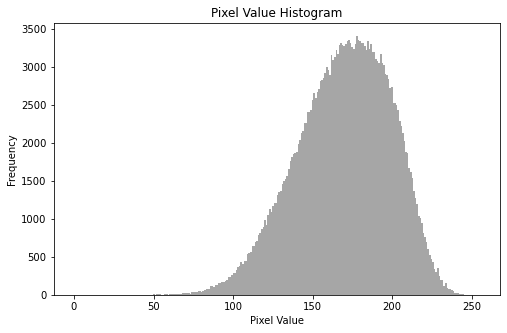

In [72]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm, gamma, lognorm, chi2, expon, beta, weibull_min, kstest, probplot, johnsonsu
from scipy.signal import correlate2d

img = Image.open("0035.jpg")
img.show()
gray_linen = img.convert("L")
gray_linen.show()

histogram_data = gray_linen.histogram()
plt.figure(figsize=(8, 5))
plt.title("Pixel Value Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.hist(range(256), bins=256, weights=histogram_data, color='gray', alpha=0.7)
plt.show()

In [73]:
# Fit different distributions and print the Kolmogorov-Smirnov statistic and parameters
distribution_names = ['norm', 'gamma', 'lognorm', 'chi2', 'expon', 'beta', 'weibull_min']

for distribution_name in distribution_names:
    distribution = getattr(scipy.stats, distribution_name)
    parameters = distribution.fit(your_data)
    fitted_curve = distribution.pdf(bins, *parameters)

    # Calculate the Kolmogorov-Smirnov statistic
    ks_statistic, ks_p_value = kstest(your_data, distribution_name, args=parameters)

    print(f"Distribution: {distribution_name}")
    print(f"KS Statistic: {ks_statistic:.4f}")
    print(f"P-Value: {ks_p_value:.4f}")
    print(f"Parameters: {parameters}")
    print("\n")

    
    


Distribution: norm
KS Statistic: 0.2263
P-Value: 0.0000
Parameters: (0.004901960784313725, 0.005880803860719431)


Distribution: gamma
KS Statistic: 0.3333
P-Value: 0.0000
Parameters: (0.3502703466660846, -1.0696716713897077e-30, 0.003152681623895557)


Distribution: lognorm
KS Statistic: 0.2795
P-Value: 0.0000
Parameters: (5.870297962519876, -1.3794755587415831e-16, 0.0005283803390731775)


Distribution: chi2
KS Statistic: 0.5230
P-Value: 0.0000
Parameters: (0.3102196310714348, -2.2652642188216776e-30, 1.5173233839584603)


Distribution: expon
KS Statistic: 0.3389
P-Value: 0.0000
Parameters: (0.0, 0.004901960784313725)


Distribution: beta
KS Statistic: 0.2443
P-Value: 0.0000
Parameters: (0.4297603861694057, 0.7924604648732789, -1.4430293350273757e-32, 0.016586488814768364)


Distribution: weibull_min
KS Statistic: 0.3606
P-Value: 0.0000
Parameters: (0.15147000940429634, -3.0916465776801004e-37, 0.014314318203102411)




(169.8577880859375, 29.354391869635915)


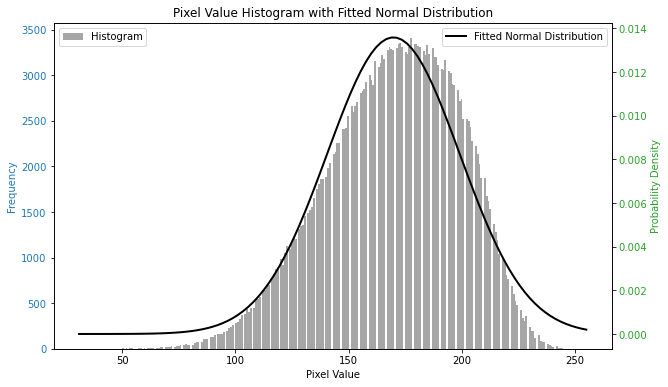

In [74]:
# Get the pixel values as a 1D array
pixel_values = np.array(gray_linen).flatten()

mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
print((mean_pixel_value, std_pixel_value))

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.title("Pixel Value Histogram with Fitted Normal Distribution")
ax1.set_xlabel("Pixel Value")
ax1.set_ylabel("Frequency", color='tab:blue')

ax1.hist(pixel_values, bins=256, color='gray', alpha=0.7, label='Histogram')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel("Probability Density", color='tab:green')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_pixel_value, std_pixel_value)
ax2.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')



plt.show()
plt.show()


(169.8577880859375, 29.354391869635915)


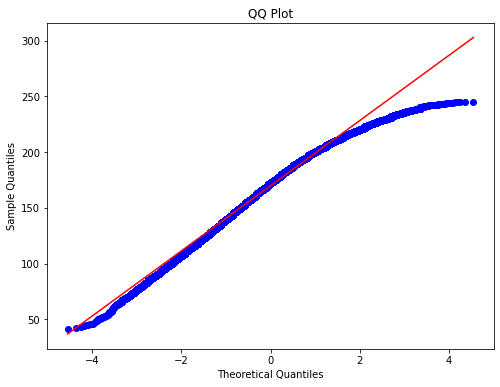

In [75]:
pixel_values = np.array(gray_linen).flatten()

mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
print((mean_pixel_value, std_pixel_value))

# Create the QQ plot
fig, ax = plt.subplots(figsize=(8, 6))

probplot(pixel_values, dist=norm, fit=True, plot=ax)
ax.set_title("QQ Plot")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

plt.show()






Fitted Johnson Distribution Parameters:
Shape: 10.14431246718956
Location: 5.794379353513212
Scale: 329.93251303719444
Shape (gamma): 56.45193349941076


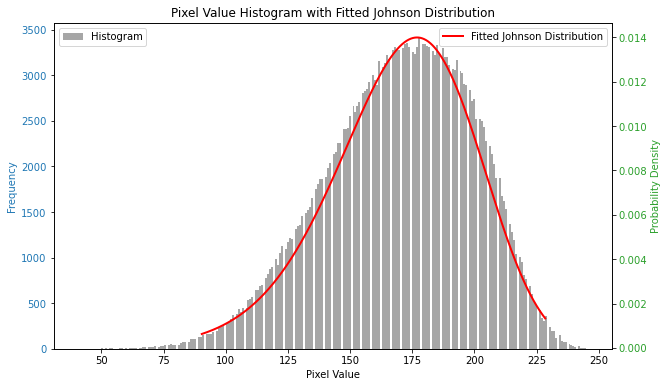

In [76]:
pixel_values = np.array(gray_linen).flatten()

mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)

# Fit the Johnson distribution to the pixel values
shape, loc, scale, shape_gamma = johnsonsu.fit(pixel_values)

print("Fitted Johnson Distribution Parameters:")
print("Shape:", shape)
print("Location:", loc)
print("Scale:", scale)
print("Shape (gamma):", shape_gamma)

# Create a Johnson distribution object using the fitted parameters
johnson_dist = johnsonsu(shape, loc, scale, shape_gamma)

# Generate data points for the PDF curve
x = np.linspace(johnson_dist.ppf(0.01), johnson_dist.ppf(0.99), 1000)
pdf_values = johnson_dist.pdf(x)

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.title("Pixel Value Histogram with Fitted Johnson Distribution")
ax1.set_xlabel("Pixel Value")
ax1.set_ylabel("Frequency", color='tab:blue')

ax1.hist(pixel_values, bins=256, color='gray', alpha=0.7, label='Histogram')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel("Probability Density", color='tab:green')

# Plot the fitted Johnson distribution
ax2.plot(x, pdf_values, 'r-', lw=2, label='Fitted Johnson Distribution')

ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')

plt.show()


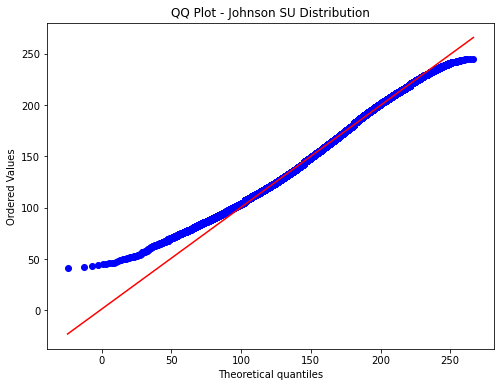

In [77]:
pixel_values = np.array(gray_linen).flatten()

# Fit Johnson SU distribution to the data
params = johnsonsu.fit(pixel_values)

fig, ax2 = plt.subplots(figsize=(8, 6))

# Create the QQ plot for Johnson Distribution
probplot(pixel_values, dist=johnsonsu, sparams=params, fit=True, plot=ax2)
ax2.set_title("QQ Plot - Johnson SU Distribution")

plt.show()


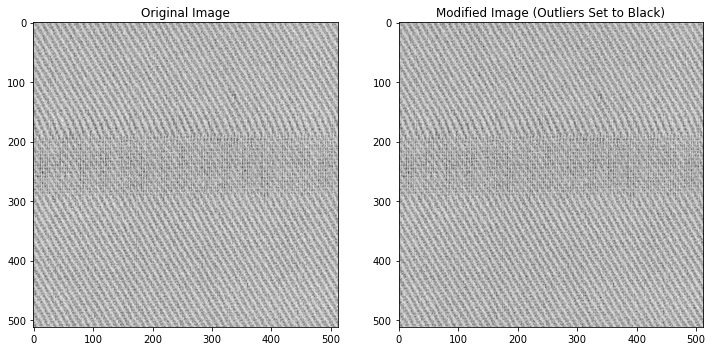

In [78]:
# Get the pixel values as a 2D array
original_pixel_values = np.array(gray_linen)

# Fit a Johnson distribution to the pixel values
shape, loc, scale, shape_gamma = johnsonsu.fit(original_pixel_values.flatten())

# Create a Johnson distribution object using the fitted parameters
johnson_dist = johnsonsu(shape, loc, scale, shape_gamma)

# Find lower and upper bounds leaving 0.001 on each side
lower_bound = int(np.floor(johnson_dist.ppf(0.001)))
upper_bound = int(np.ceil(johnson_dist.ppf(0.999)))

# Identify pixels outside the bounds and set their values to zero (black)
out_of_bounds = np.logical_or(original_pixel_values < lower_bound, original_pixel_values > upper_bound)
original_pixel_values[out_of_bounds] = 0

modified_pixel_values = np.array(modified_image)

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_pixel_values, cmap='gray')
plt.title("Original Image")

# Modified Image
plt.subplot(1, 2, 2)
plt.imshow(modified_pixel_values, cmap='gray')
plt.title("Modified Image (Outliers Set to Black)")

plt.show()


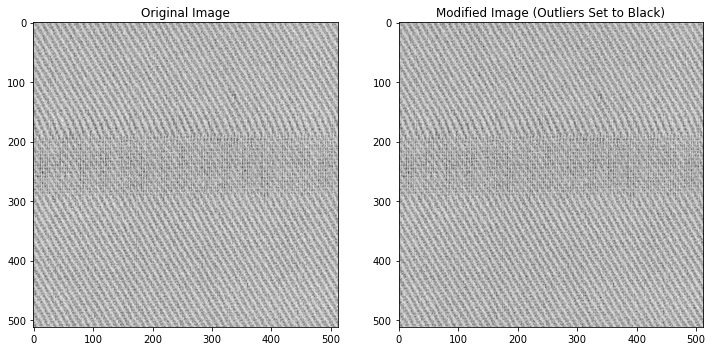

In [86]:
def modify_image_patch(image_patch):
    # Fit a Johnson distribution to the pixel values in the patch
    shape, loc, scale, shape_gamma = johnsonsu.fit(image_patch.flatten())

    johnson_dist = johnsonsu(shape, loc, scale, shape_gamma)

    # Find lower and upper bounds leaving 0.001 on each side
    lower_bound = int(np.floor(johnson_dist.ppf(0.001)))
    upper_bound = int(np.ceil(johnson_dist.ppf(0.999)))

    # Identify pixels outside the bounds and set their values to zero (black)
    out_of_bounds = np.logical_or(image_patch < lower_bound, image_patch > upper_bound)
    image_patch[out_of_bounds] = 0

    return image_patch


img = Image.open("0035.jpg")
img.show()
gray_linen = img.convert("L")

# Get the pixel values as a 2D array
pixel_values = np.array(gray_linen)

window_size = 51

# Iterate over image patches with the specified window size
for i in range(0, pixel_values.shape[0] - window_size + 1, window_size):
    for j in range(0, pixel_values.shape[1] - window_size + 1, window_size):
        image_patch = pixel_values[i:i + window_size, j:j + window_size]

        modified_patch = modify_image_patch(image_patch)

        pixel_values[i:i + window_size, j:j + window_size] = modified_patch

#Generate modified image in computer for comparison analysis with many outputs         
modified_image = Image.fromarray(pixel_values.astype(np.uint8))
modified_image.save("modified.jpg")

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_pixel_values, cmap='gray')
plt.title("Original Image")

# Modified Image
plt.subplot(1, 2, 2)
plt.imshow(modified_image, cmap='gray')
plt.title("Modified Image (Outliers Set to Black)")

plt.show()



The code below is used to analyze each window seperately to observe whether all distributions in windows follows Johnson's SU Distribution


In [ ]:
"""
pixel_values = np.array(gray_linen)

window_size = 51

# Get image dimensions
height, width = pixel_values.shape

# Iterate over image patches with the specified window size
for i in range(0, height - window_size + 1, window_size):
    for j in range(0, width - window_size + 1, window_size):
        image_patch = pixel_values[i:i+window_size, j:j+window_size].flatten()

        # Calculate mean and standard deviation of pixel values in the patch
        mean_pixel_value = np.mean(image_patch)
        std_pixel_value = np.std(image_patch)

        plt.figure(figsize=(10, 6))
        plt.hist(image_patch, bins=256, color='gray', alpha=0.7, label='Histogram')
        plt.title(f"Patch ({i//window_size}, {j//window_size}) - Histogram")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

        # Plot the fitted normal distribution
        plt.figure(figsize=(10, 6))
        x = np.linspace(min(image_patch), max(image_patch), 100)
        p = norm.pdf(x, mean_pixel_value, std_pixel_value)
        plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
        plt.title(f"Patch ({i//window_size}, {j//window_size}) - Fitted Normal Distribution")
        plt.xlabel("Pixel Value")
        plt.ylabel("Probability Density")
        plt.legend()
        plt.show()

        # Plot the fitted Johnson distribution
        plt.figure(figsize=(10, 6))
        shape, loc, scale, shape_gamma = johnsonsu.fit(image_patch)
        johnson_dist = johnsonsu(shape, loc, scale, shape_gamma)
        pdf_values = johnson_dist.pdf(x)
        plt.plot(x, pdf_values, 'r-', lw=2, label='Fitted Johnson Distribution')
        plt.title(f"Patch ({i//window_size}, {j//window_size}) - Fitted Johnson Distribution")
        plt.xlabel("Pixel Value")
        plt.ylabel("Probability Density")
        plt.legend()
        plt.show()
"""

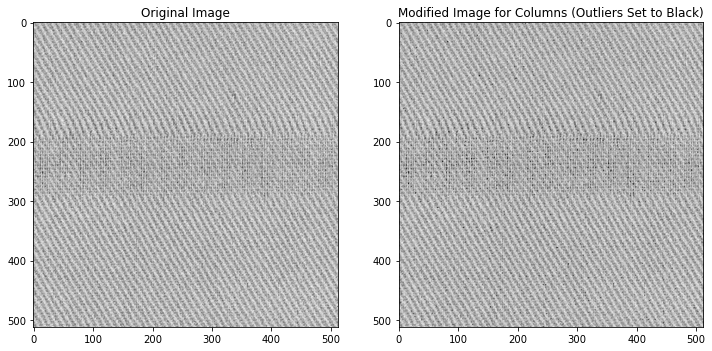

In [80]:
def modify_out_of_control_pixels(data, mean_values, std_values, k):
    # Identify pixels outside the control limits and set their values to zero (black)
    out_of_control = np.logical_or(data < mean_values - k * std_values,
                                   data > mean_values + k * std_values)
    data[out_of_control] = 0
    return data



pixel_values = np.array(gray_linen)

# Define control chart parameters
k = 3  # Number of standard deviations for control limits

column_means = np.mean(pixel_values, axis=0)
column_std_devs = np.std(pixel_values, axis=0)

# Modify out-of-control pixels in columns
pixel_values_columns = modify_out_of_control_pixels(pixel_values.T.copy(), column_means, column_std_devs, k).T

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_pixel_values, cmap='gray')
plt.title("Original Image")

# Modified Image for Columns
plt.subplot(1, 2, 2)
plt.imshow(pixel_values_columns, cmap='gray')
plt.title("Modified Image for Columns (Outliers Set to Black)")

plt.show()


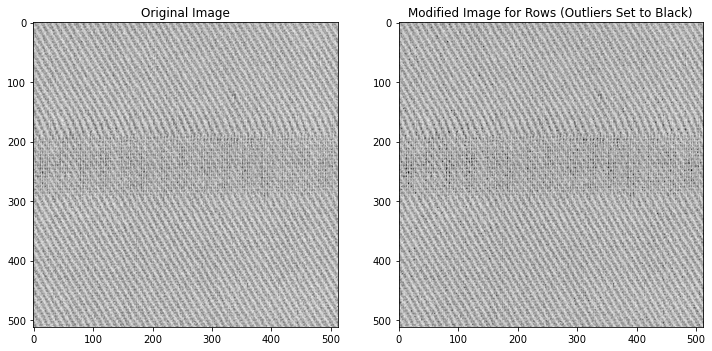

In [81]:
def modify_out_of_control_pixels(data, mean_values, std_values, k):
    # Identify pixels outside the control limits and set their values to zero (black)
    out_of_control = np.logical_or(data < mean_values - k * std_values,
                                   data > mean_values + k * std_values)
    data[out_of_control] = 0
    return data



pixel_values = np.array(gray_linen)

# Define control chart parameters for rows
k = 3  # Number of standard deviations for control limits

row_means = np.mean(pixel_values, axis=1)
row_std_devs = np.std(pixel_values, axis=1)

pixel_values_rows = modify_out_of_control_pixels(pixel_values.copy(), row_means, row_std_devs, k)

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_pixel_values, cmap='gray')
plt.title("Original Image")

# Modified Image for Rows
plt.subplot(1, 2, 2)
plt.imshow(pixel_values_rows, cmap='gray')
plt.title("Modified Image for Rows (Outliers Set to Black)")

plt.show()


OUR PROPOSAL

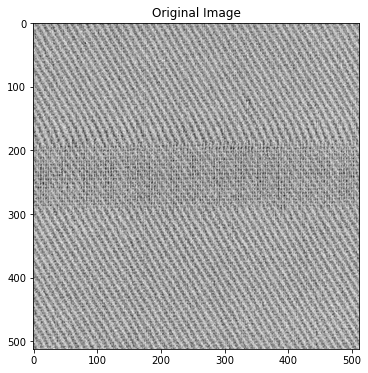

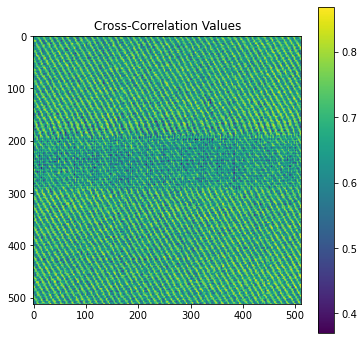

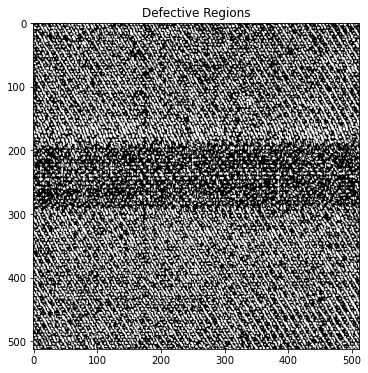

In [90]:
from scipy.signal import correlate2d

def calculate_cross_correlation(image):
    # Normalize pixel values to be between 0 and 1
    normalized_image = image / 255.0

    # Create a kernel for cross-correlation
    kernel = np.ones((3, 3)) / 9  # 3x3 averaging filter, you can adjust the size as needed

    # Apply cross-correlation to the image
    cross_correlation = correlate2d(normalized_image, kernel, mode='same', boundary='symm')

    return cross_correlation

def create_control_chart(data, threshold=0.95):
    # Calculate mean and standard deviation of the cross-correlation values
    mean_value = np.mean(data)
    std_value = np.std(data)

    # Define control limits based on the distribution of cross-correlation values
    lower_limit = mean_value - threshold * std_value
    upper_limit = mean_value + threshold * std_value

    return lower_limit, upper_limit

def identify_defective_regions(image, control_limits):
    # Calculate cross-correlation for the given image
    cross_correlation = calculate_cross_correlation(image)

    # Identify regions where cross-correlation values are outside the control limits
    defective_regions = np.logical_or(cross_correlation < control_limits[0], cross_correlation > control_limits[1])

    return defective_regions

img = Image.open("0035.jpg")
gray_image = img.convert("L")

# Get the pixel values as a 2D array
pixel_values = np.array(gray_image)

# Calculate cross-correlation for the image
cross_correlation_values = calculate_cross_correlation(pixel_values)

# Create a control chart based on the cross-correlation values
control_limits = create_control_chart(cross_correlation_values)

# Identify defective regions in the image
defective_regions = identify_defective_regions(pixel_values, control_limits)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(pixel_values, cmap='gray')
plt.title("Original Image")
plt.show()

# Display the cross-correlation values
plt.figure(figsize=(6, 6))
plt.imshow(cross_correlation_values, cmap='viridis', interpolation='none')
plt.title("Cross-Correlation Values")
plt.colorbar()
plt.show()

# Display the identified defective regions
plt.figure(figsize=(6, 6))
plt.imshow(defective_regions, cmap='gray')
plt.title("Defective Regions")
plt.show()


Overall Comparison

In [83]:
np.random.seed(423423)

# Generate 100 random integers between 2 and 196 (both included)
random_integers = np.random.randint(2, 197, size=100)

available_indices = random_integers[random_integers <= 146]

print(available_indices)

[ 39 145 144  50 126   3  52  84  99 105  53 131   9  36  94  30  72 125
 115  15  98  51  62  33  68 146 133  53  85 122 138  88 100  11  22  18
 124  63 139  69   7 137  17  29  76  70  66  92  55  17  28  34  20 139
  83  32  74 115  13  65 134  30 135 144  85  43 115  83  61  70 115  75
  66]


In [84]:
selected_images = ["0003.jpg", "0039.jpg", "0084.jpg", "0099.jpg", "0145.jpg"]

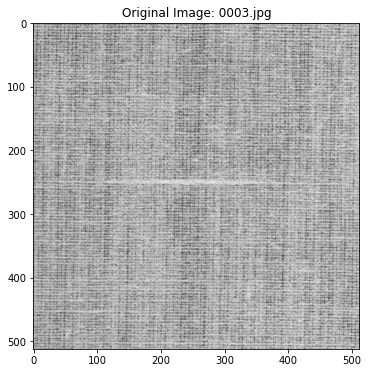

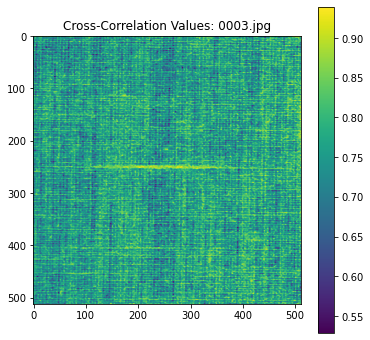

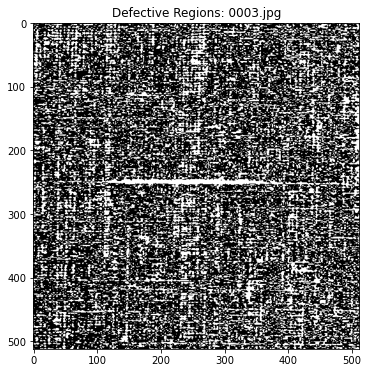

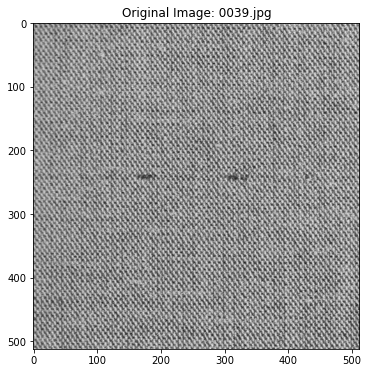

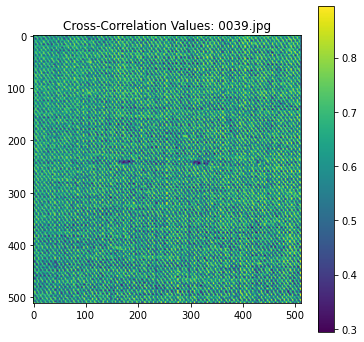

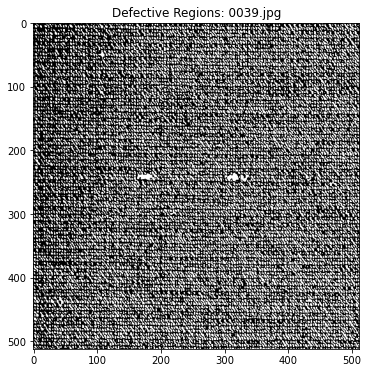

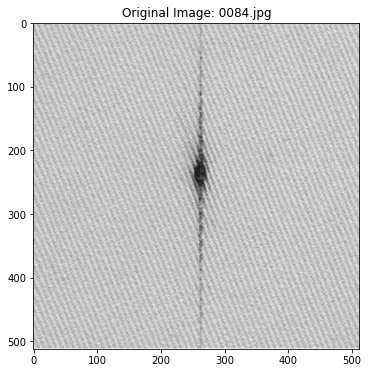

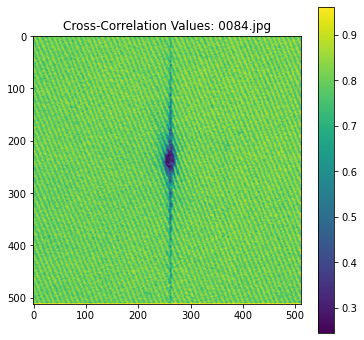

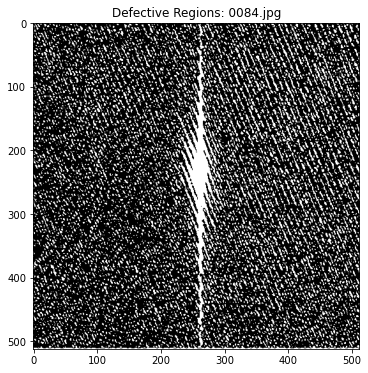

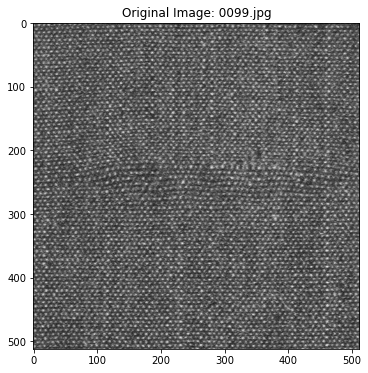

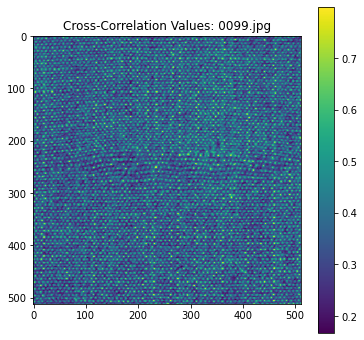

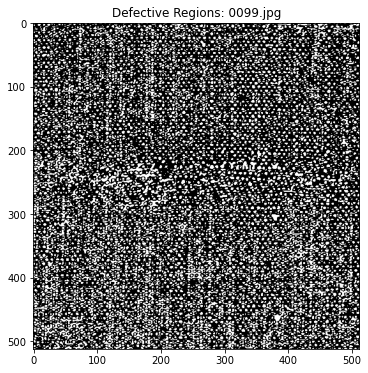

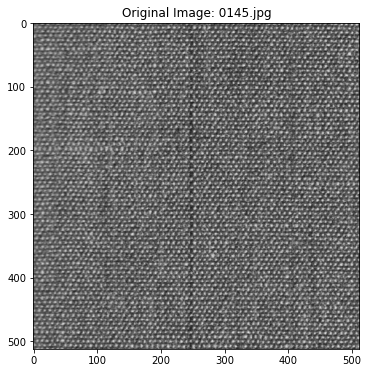

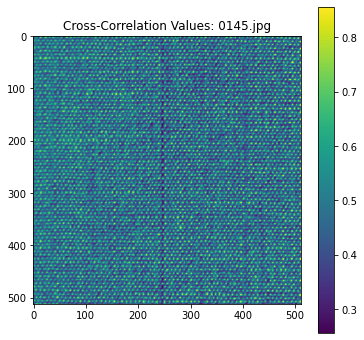

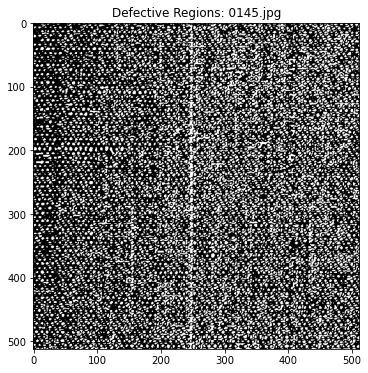

In [85]:
for image_filename in selected_images:
    img = Image.open(image_filename)

    gray_image = img.convert("L")
    
    pixel_values = np.array(gray_image)

    cross_correlation_values = calculate_cross_correlation(pixel_values)

    control_limits = create_control_chart(cross_correlation_values)

    defective_regions = identify_defective_regions(pixel_values, control_limits)

    # original image
    plt.figure(figsize=(6, 6))
    plt.imshow(pixel_values, cmap='gray')
    plt.title(f"Original Image: {image_filename}")
    plt.show()

    # cross-correlation values
    plt.figure(figsize=(6, 6))
    plt.imshow(cross_correlation_values, cmap='viridis', interpolation='none')
    plt.title(f"Cross-Correlation Values: {image_filename}")
    plt.colorbar()
    plt.show()

    # identified defective regions
    plt.figure(figsize=(6, 6))
    plt.imshow(defective_regions, cmap='gray')
    plt.title(f"Defective Regions: {image_filename}")
    plt.show()